<a href="https://colab.research.google.com/github/Roshano1/Data-Analysis/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing and expecting data

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =pd.read_excel('/content/drive/MyDrive/Salary Data/DataCamp Workbook (2) (2).xlsx')

In [ ]:
df

,Year,Name,Headquarters,Industry,Revenue ($B),Profit ($B)
0,2017,Walmart,USA,General merchandisers,486,13.6
1,2017,State Grid,China,Utilities,315,9.6
2,2017,Sinopec Group,China,Petroleum refining,268,1.3
3,2017,China National Petroleum,China,Petroleum refining,263,1.9
4,2017,Toyota,Japan,Automotive,255,16.9
5,2017,Volkswagen Group,Germany,Automotive,240,5.9
6,2017,Royal Dutch Shell,Netherlands,Petroleum refining,240,4.6
7,2017,Berkshire Hathaway,USA,Conglomerate,224,24.1
8,2017,Apple,USA,Electronics,216,45.7
9,2017,Exxon Mobil,USA,Petroleum refining,205,7.8


In [ ]:
df.head()

,Year,Name,Headquarters,Industry,Revenue ($B),Profit ($B)
0,2017,Walmart,USA,General merchandisers,486,13.6
1,2017,State Grid,China,Utilities,315,9.6
2,2017,Sinopec Group,China,Petroleum refining,268,1.3
3,2017,China National Petroleum,China,Petroleum refining,263,1.9
4,2017,Toyota,Japan,Automotive,255,16.9


In [ ]:
df.tail()


,Year,Name,Headquarters,Industry,Revenue ($B),Profit ($B)
5,2017,Volkswagen Group,Germany,Automotive,240,5.9
6,2017,Royal Dutch Shell,Netherlands,Petroleum refining,240,4.6
7,2017,Berkshire Hathaway,USA,Conglomerate,224,24.1
8,2017,Apple,USA,Electronics,216,45.7
9,2017,Exxon Mobil,USA,Petroleum refining,205,7.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          10 non-null     int64  
 1   Name          10 non-null     object 
 2   Headquarters  10 non-null     object 
 3   Industry      10 non-null     object 
 4   Revenue ($B)  10 non-null     int64  
 5   Profit ($B)   10 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 608.0+ bytes


In [ ]:
df[['Revenue ($B)','Profit ($B)']].describe().round(2)

,Revenue ($B),Profit ($B)
count,10.00,10.00
mean,271.20,13.14
std,81.65,13.45
min,205.00,1.30
25%,228.00,4.92
50%,247.50,8.70
75%,266.75,16.08
max,486.00,45.70


In [ ]:
df['Headquarters'].value_counts()

USA            4
China          3
Japan          1
Germany        1
Netherlands    1
Name: Headquarters, dtype: int64

In [ ]:
df['Headquarters'].unique()

array(['USA', 'China', 'Japan', 'Germany', 'Netherlands'], dtype=object)

In [ ]:
df['Headquarters'].nunique()

5

In [ ]:
df[['Headquarters','Industry']].value_counts()

Headquarters  Industry             
China         Petroleum refining       2
              Utilities                1
Germany       Automotive               1
Japan         Automotive               1
Netherlands   Petroleum refining       1
USA           Conglomerate             1
              Electronics              1
              General merchandisers    1
              Petroleum refining       1
dtype: int64

In [ ]:
df['Year'].unique()

array([2017])

In [ ]:
df['Industry'].unique()

array(['General merchandisers', 'Utilities', 'Petroleum refining',
       'Automotive', 'Conglomerate', 'Electronics'], dtype=object)

In [ ]:
df.isna().sum()

Year            0
Name            0
Headquarters    0
Industry        0
Revenue ($B)    0
Profit ($B)     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Exploring & Analysis Data


In [ ]:
df.sample(10)

,Year,Name,Headquarters,Industry,Revenue ($B),Profit ($B)
7,2017,Berkshire Hathaway,USA,Conglomerate,224,24.1
4,2017,Toyota,Japan,Automotive,255,16.9
6,2017,Royal Dutch Shell,Netherlands,Petroleum refining,240,4.6
0,2017,Walmart,USA,General merchandisers,486,13.6
5,2017,Volkswagen Group,Germany,Automotive,240,5.9
3,2017,China National Petroleum,China,Petroleum refining,263,1.9
8,2017,Apple,USA,Electronics,216,45.7
1,2017,State Grid,China,Utilities,315,9.6
2,2017,Sinopec Group,China,Petroleum refining,268,1.3
9,2017,Exxon Mobil,USA,Petroleum refining,205,7.8


<Axes: >

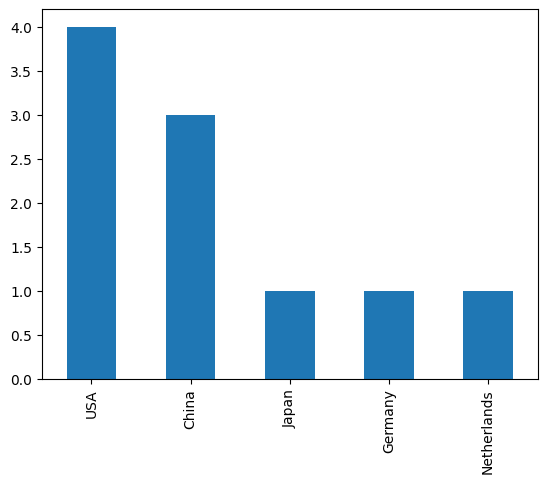

In [ ]:
df['Headquarters'].value_counts().plot.bar()

<Axes: >

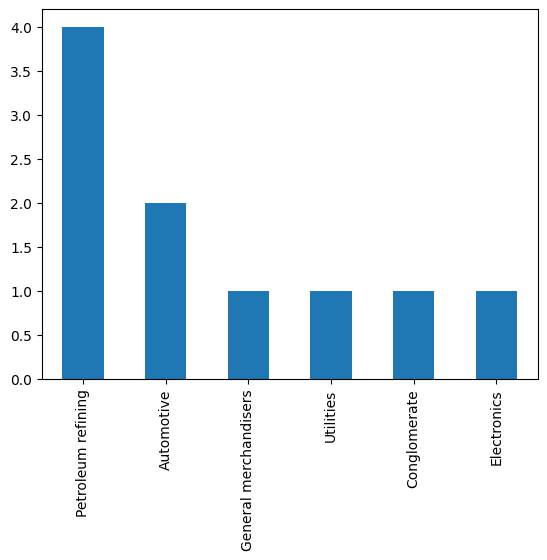

In [ ]:
df['Industry'].value_counts().plot.bar()

In [ ]:
df[df['Industry']=='Automotive'].groupby(['Name','Headquarters']).sum()['Revenue ($B)'].nlargest()

<ipython-input-49-4ff93af38753>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['Industry']=='Automotive'].groupby(['Name','Headquarters']).sum()['Revenue ($B)'].nlargest()


Name              Headquarters
Toyota            Japan           255
Volkswagen Group  Germany         240
Name: Revenue ($B), dtype: int64

In [ ]:
df[df['Industry']=='Petroleum refining'].groupby(['Name','Headquarters']).sum()['Revenue ($B)'].nlargest()

<ipython-input-50-e9ab48314d88>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['Industry']=='Petroleum refining'].groupby(['Name','Headquarters']).sum()['Revenue ($B)'].nlargest()


Name                      Headquarters
Sinopec Group             China           268
China National Petroleum  China           263
Royal Dutch Shell         Netherlands     240
Exxon Mobil               USA             205
Name: Revenue ($B), dtype: int64

In [ ]:
df['total_profit'] =(df['Revenue ($B)'] - df['Profit ($B)'])

In [ ]:
df

,Year,Name,Headquarters,Industry,Revenue ($B),Profit ($B),total_profit
0,2017,Walmart,USA,General merchandisers,486,13.6,472.4
1,2017,State Grid,China,Utilities,315,9.6,305.4
2,2017,Sinopec Group,China,Petroleum refining,268,1.3,266.7
3,2017,China National Petroleum,China,Petroleum refining,263,1.9,261.1
4,2017,Toyota,Japan,Automotive,255,16.9,238.1
5,2017,Volkswagen Group,Germany,Automotive,240,5.9,234.1
6,2017,Royal Dutch Shell,Netherlands,Petroleum refining,240,4.6,235.4
7,2017,Berkshire Hathaway,USA,Conglomerate,224,24.1,199.9
8,2017,Apple,USA,Electronics,216,45.7,170.3
9,2017,Exxon Mobil,USA,Petroleum refining,205,7.8,197.2


In [ ]:
df= pd.pivot_table(df, values='total_profit', aggfunc=sum, index='Name',  margins_name='Total')
df

,total_profit
Name,
Apple,170.3
Berkshire Hathaway,199.9
China National Petroleum,261.1
Exxon Mobil,197.2
Royal Dutch Shell,235.4
Sinopec Group,266.7
State Grid,305.4
Toyota,238.1
Volkswagen Group,234.1


<Axes: xlabel='Name'>

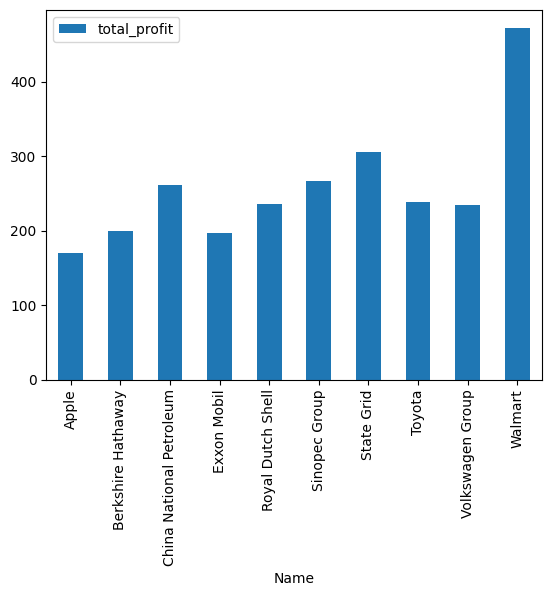

In [ ]:
df.plot.bar()

In [74]:
df

,total_profit
Name,
Apple,170.3
Berkshire Hathaway,199.9
China National Petroleum,261.1
Exxon Mobil,197.2
Royal Dutch Shell,235.4
Sinopec Group,266.7
State Grid,305.4
Toyota,238.1
Volkswagen Group,234.1


In [75]:
df.to_csv('sampleproject1.csv')